In [3]:
import pandas as pd
from pycaret.classification import *

estacion = '5530E'
df = pd.read_csv(r'./data/'+estacion+'_clean.csv', sep=',')

In [50]:
estacion_unsee = '3129'
df_unsee = pd.read_csv(r'./data/'+estacion+'_clean.csv', sep=',')

In [55]:
df_unsee.describe().T

,count,mean,std,min,25%,50%,75%,max
tmed,3287.0,16.580529,7.472085,-0.2,10.1,16.2,22.80,33.3
prec,3287.0,0.962838,3.476148,0.0,0.0,0.0,0.00,52.1
tmin,3287.0,8.245756,6.724084,-7.5,2.7,8.4,13.75,25.3
tmax,3287.0,24.916611,8.888129,5.5,17.2,24.3,32.40,46.0
dir,3287.0,45.273350,35.637903,1.0,20.0,27.0,99.00,99.0
velmedia,3287.0,2.402921,1.290806,0.0,1.4,2.2,3.10,10.6
racha,3287.0,9.563432,3.129678,2.2,7.8,9.7,11.40,30.0
sol,3287.0,8.788956,3.956713,0.0,6.3,9.5,12.00,14.3
presmax,3287.0,954.356404,5.028175,928.1,951.4,953.8,957.10,975.0
presmin,3287.0,949.954487,5.464782,918.5,947.1,949.7,952.85,971.7


In [4]:
df.columns

Index(['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
       'rain_tomorrow', 'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_'],
      dtype='object')

In [5]:
X = df[['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
        'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_']]
y = df['rain_tomorrow']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
list_of_features = ['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today', 
        'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_']
exp_clf101 = setup(data = df,  target = 'rain_tomorrow', fold_shuffle = True, numeric_features = list_of_features)

,Description,Value
0,session_id,897
1,Target,rain_tomorrow
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3287, 19)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = compare_models(include=['lr','knn','dt','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8470,0.8514,0.4362,0.6635,0.5240,0.4379,0.4526,0.6440
knn,K Neighbors Classifier,0.8204,0.7590,0.2998,0.5687,0.3910,0.2983,0.3198,0.0580
dt,Decision Tree Classifier,0.7935,0.6741,0.4788,0.4689,0.4729,0.3447,0.3453,0.0090
svm,SVM - Linear Kernel,0.7883,0.0000,0.2497,0.2694,0.2133,0.1560,0.1769,0.0110


### Linear Regresion

In [19]:
lr = create_model('lr')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8696,0.8799,0.4545,0.7692,0.5714,0.5004,0.5246
1,0.8348,0.8683,0.4318,0.5938,0.5000,0.4040,0.4113
2,0.8609,0.8531,0.3864,0.7727,0.5152,0.4443,0.4807
3,0.8609,0.8639,0.5111,0.6970,0.5897,0.5084,0.5172
4,0.8522,0.8639,0.4889,0.6667,0.5641,0.4776,0.4860
5,0.8348,0.8227,0.4000,0.6207,0.4865,0.3935,0.4070
6,0.8391,0.8471,0.4000,0.6429,0.4932,0.4036,0.4197
7,0.8652,0.8808,0.5333,0.7059,0.6076,0.5281,0.5357
8,0.8348,0.8354,0.4444,0.6061,0.5128,0.4162,0.4234
9,0.8174,0.7988,0.3111,0.5600,0.4000,0.3025,0.3207


In [14]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=897, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


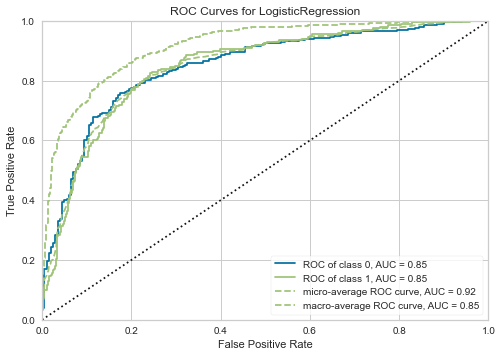

In [15]:
plot_model(lr, plot = 'auc')

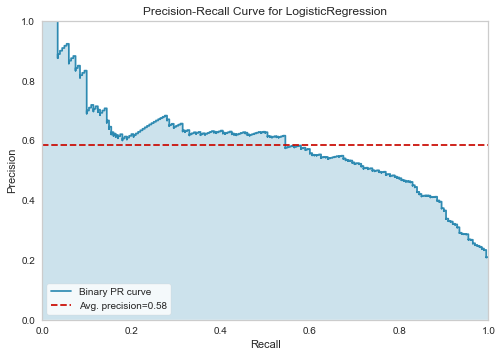

In [16]:
plot_model(lr, plot = 'pr')

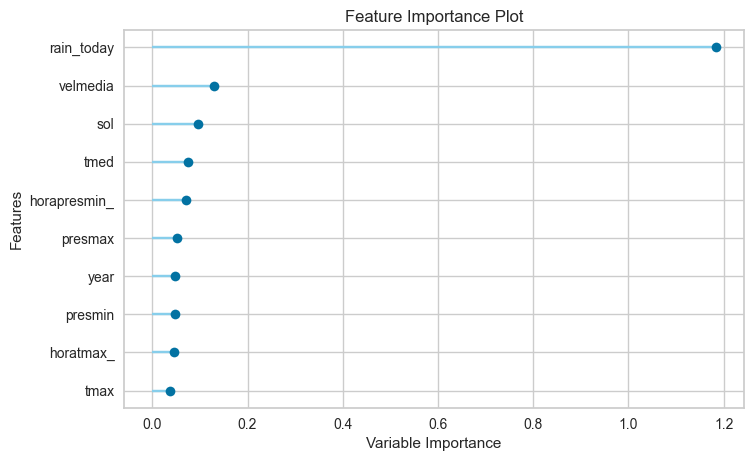

In [28]:
plot_model(lr, plot='feature')

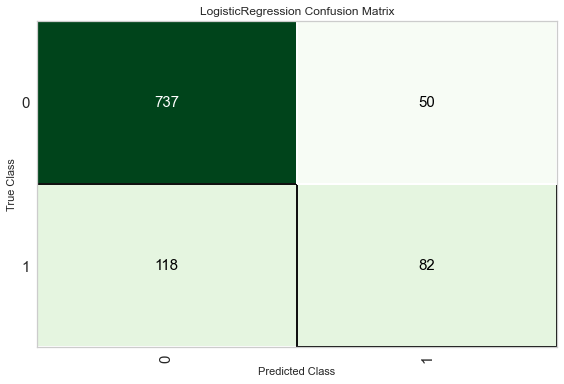

In [18]:
plot_model(lr, plot = 'confusion_matrix')

### KNN

In [20]:
knn = create_model('knn')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8087,0.7158,0.2500,0.5000,0.3333,0.2359,0.2552
1,0.8174,0.7969,0.3636,0.5333,0.4324,0.3282,0.3368
2,0.8348,0.7816,0.2955,0.6500,0.4062,0.3256,0.3599
3,0.8217,0.7530,0.3111,0.5833,0.4058,0.3122,0.3336
4,0.8043,0.7932,0.2889,0.5000,0.3662,0.2602,0.2739
5,0.8435,0.7671,0.3556,0.6957,0.4706,0.3898,0.4201
6,0.8522,0.7766,0.4222,0.7037,0.5278,0.4466,0.4671
7,0.8087,0.7333,0.2444,0.5238,0.3333,0.2385,0.2622
8,0.8261,0.7705,0.3111,0.6087,0.4118,0.3220,0.3471
9,0.7870,0.7019,0.1556,0.3889,0.2222,0.1243,0.1419


In [21]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8087,0.6995,0.5227,0.5000,0.5111,0.3923,0.3924
1,0.7957,0.6828,0.5000,0.4681,0.4835,0.3563,0.3566
2,0.7826,0.6487,0.4318,0.4318,0.4318,0.2974,0.2974
3,0.8174,0.7015,0.5111,0.5349,0.5227,0.4099,0.4101
4,0.8391,0.7739,0.6667,0.5769,0.6186,0.5173,0.5195
5,0.7957,0.6544,0.4222,0.4750,0.4471,0.3223,0.3231
6,0.7783,0.6435,0.4222,0.4318,0.4270,0.2895,0.2895
7,0.7870,0.6489,0.4222,0.4524,0.4368,0.3056,0.3059
8,0.7565,0.6468,0.4667,0.3962,0.4286,0.2752,0.2767
9,0.7739,0.6408,0.4222,0.4222,0.4222,0.2817,0.2817


In [22]:

svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8217,0.0000,0.4318,0.5429,0.4810,0.3751,0.3787
1,0.5783,0.0000,0.9545,0.3066,0.4641,0.2456,0.3557
2,0.8087,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8217,0.0000,0.4667,0.5526,0.5060,0.3982,0.4003
4,0.8043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8217,0.0000,0.5778,0.5417,0.5591,0.4476,0.4479
6,0.8043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8130,0.0000,0.0667,0.7500,0.1224,0.0935,0.1859
9,0.8043,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


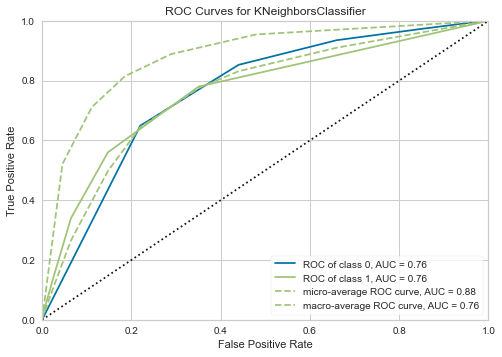

In [23]:
plot_model(knn, plot = 'auc')

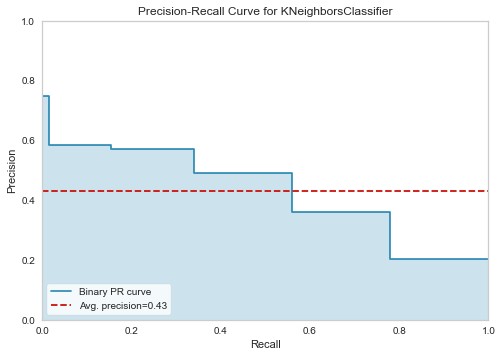

In [24]:

plot_model(knn, plot = 'pr')

In [42]:
#Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.
#plot_model(knn, plot='feature')

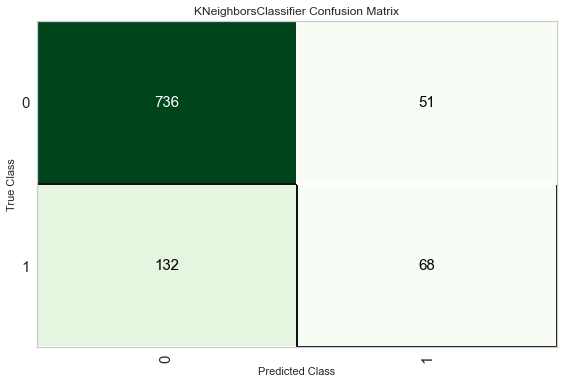

In [27]:

plot_model(knn, plot = 'confusion_matrix')

### Decision Tree

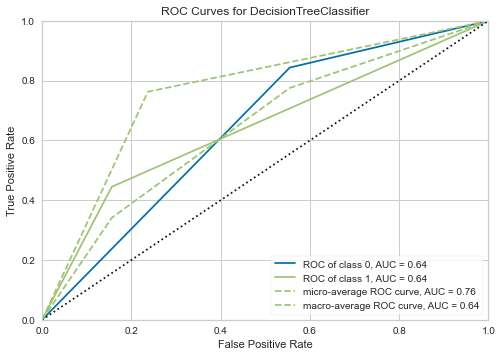

In [43]:
plot_model(dt, plot = 'auc')


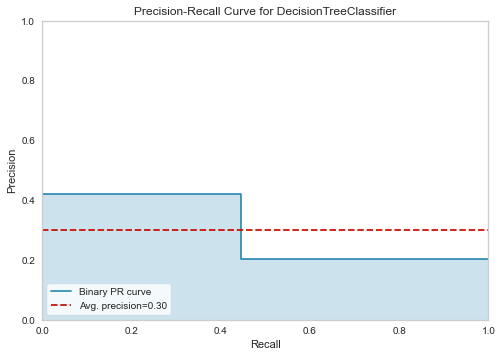

In [44]:
plot_model(dt, plot = 'pr')


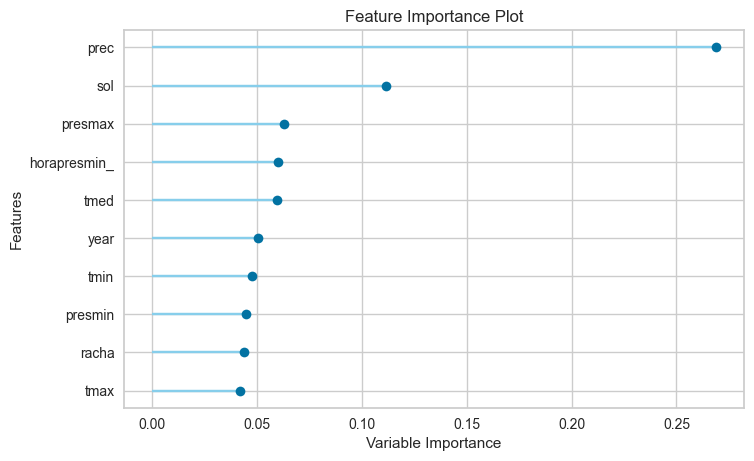

In [45]:
plot_model(dt, plot='feature')


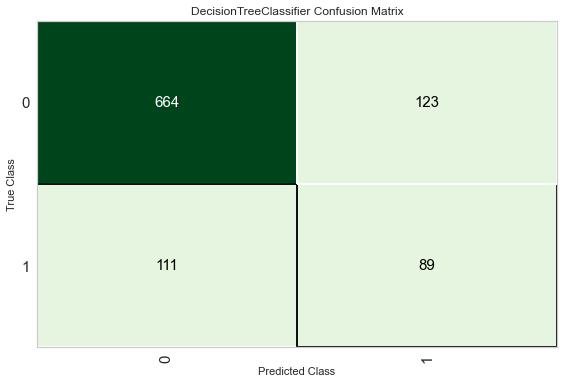

In [46]:
plot_model(dt, plot = 'confusion_matrix')

### SVM

In [40]:
# AUC plot not available for estimators with no predict_proba attribute.
# plot_model(svm, plot = 'auc')

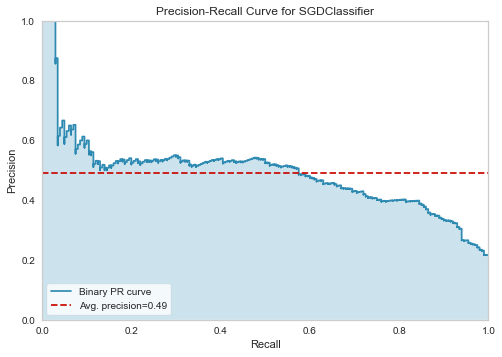

In [47]:
plot_model(svm, plot = 'pr')

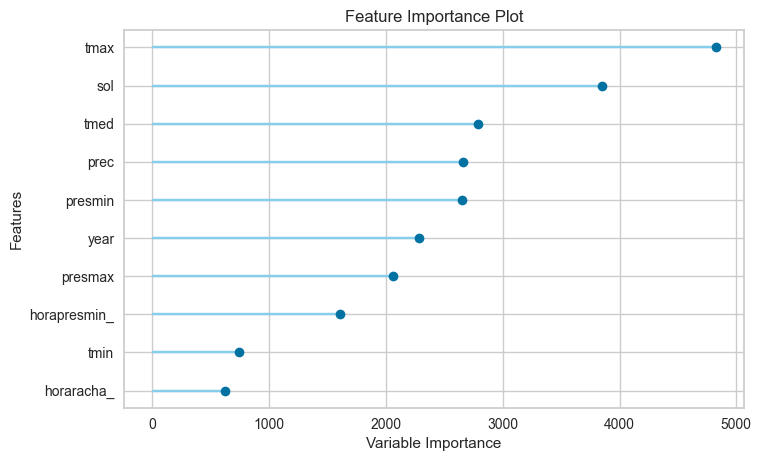

In [48]:
plot_model(svm, plot='feature')

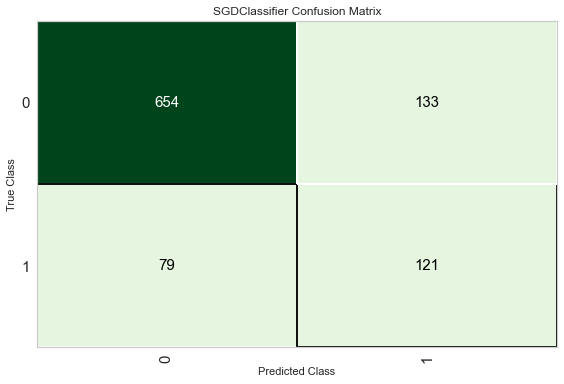

In [49]:
plot_model(svm, plot = 'confusion_matrix')

### Finalize models to check unsee data

In [51]:
final_lr = finalize_model(lr)


In [52]:
final_knn = finalize_model(knn)


In [53]:
final_dt = finalize_model(dt)

In [54]:
final_svm = finalize_model(svm)

In [56]:
unseen_lr_predictions = predict_model(final_lr, data=df_unsee)

In [57]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8318,0.8547,0.4000,0.6349,0.4908,0.3962,0.4114


In [59]:
from pycaret.utils import check_metric
check_metric(unseen_lr_predictions['rain_tomorrow'], unseen_lr_predictions['Label'], metric = 'Accuracy')

0.8439